<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/DataStructuresAndAlgorithms/Lecture%2002%20-%20Complexidade%20e%20Programa%C3%A7%C3%A3o%20Din%C3%A2mica/DataStructures_Lecture_02_Complexity_and_Dynamic_Programming-LectureNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complexity and BigO

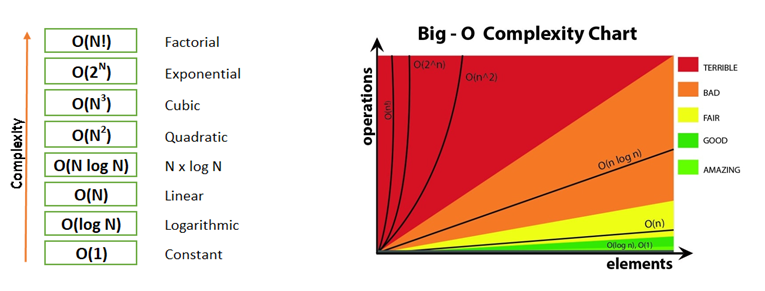

# Qual a complexidade dos Códigos abaixo?

In [2]:


def f0(N): #Resposta: O(1)
    a = N

def f1(N): #Resposta: O(N)

  for i in range(N):
      #do something

def f2(N): #O(n) + O(n) = 2*O(N) = O(N)
  for i in range(N):
      #do something

  for i in range(N):
      #do something

def f3(N): #Resposta: O(N^2)
    for i in range(N):
        for j in range(N):
            #do something

def f4(N): #Resposta: O(N/2) -> O(N)
    for i in range(int(N/2)):
        #do something

def f5(N): #Resposta: O(N^2) * O(N)
    sum = 0
    for i in range(N*N): O(N^2)
      for i in range(N): O(N)
        #do something

def f6(N): O (log n)
    i=1
    while(i<40):
        i = i*2
        #do something


def f7(N): O(N) * O(N) = O(N)
    for i in range(N):
        for j in range(int((N-i)/2)):
            #do something


def f8(N): O(N^3)
    for i in range(N):
        for j in range(N):
            for z in range(N):
              #do something

IndentationError: expected an indented block after 'for' statement on line 8 (ipython-input-2883927292.py, line 11)

# Vamos construir uma analise quantitativa?
  * Adicione alguma métrica (i.e passos (iterações))
  * Crie um gráfico comparativo

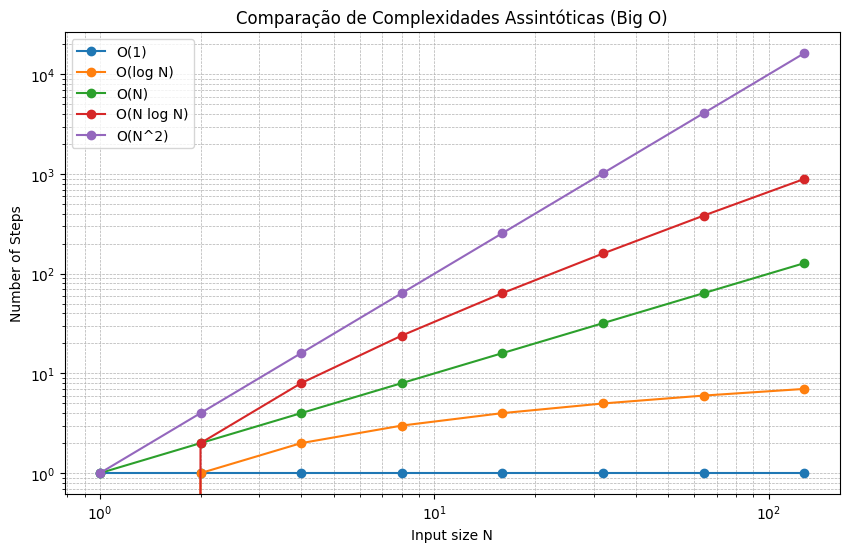

In [7]:
import matplotlib.pyplot as plt
# Funções com contador de passos
def O_1(N):
    steps = 1
    a = N  # operação qualquer
    return steps

def O_logN(N):
    steps = 0
    i = 1
    while i < N:
        steps += 1
        i *= 2
    return steps

def O_N(N):
    steps = 0
    for i in range(N):
        steps += 1
    return steps

def O_N_logN(N):
    steps = 0
    for i in range(N):
        j = 1
        while j < N:
            steps += 1
            j *= 2
    return steps

def O_N2(N):
    steps = 0
    for i in range(N):
        for j in range(N):
            steps += 1
    return steps

# Lista de funções e rótulos
funcs = [O_1, O_logN, O_N, O_N_logN, O_N2]
labels = ["O(1)", "O(log N)", "O(N)", "O(N log N)", "O(N^2)"]

# Valores de N
Ns = [1, 2, 4, 8, 16, 32, 64, 128]

# Coleta resultados
results = {label: [] for label in labels}
for N in Ns:
    for func, label in zip(funcs, labels):
        results[label].append(func(N))

# Plot log-log
plt.figure(figsize=(10,6))
for label in labels:
    plt.plot(Ns, results[label], marker='o', label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Input size N")
plt.ylabel("Number of Steps")
plt.title("Comparação de Complexidades Assintóticas (Big O)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#Quais as notações dos algoritmos de ordenação abaixo:
  * Bubble
  * Insert
  * Selection
  * Quick Sort

##Bubble

Para cada elemento, em média, ele precisa percorrer metade da lista para “borbulhar” o maior elemento até o final.

Com n elementos, isso gera aproximadamente n * n / 2 => O(n^2)

## Insert Sort
Cada elemento é comparado com a metade dos elementos anteriores, em média.

Com n elementos, o total médio de comparações e movimentos também é O(n^2)

## Selection

Sempre percorre toda a lista não ordenada para encontrar o mínimo, independente da ordem dos elementos.

Logo, o número de comparações é sempre aproximadamente n^2/2 ==> O(n^2)

O QuickSort divide a lista recursivamente em duas sublistas usando um pivô.

No caso médio, assumimos que o pivô divide a lista aproximadamente ao meio.

Cada nível de recursão precisa percorrer todos os elementos da sublista atual uma vez para fazer a partição → O (n)

O número de níveis de recursão é log n porque a cada partição a lista é dividida aproximadamente pela metade.

Logo temos: O(n) * O(log n) = O( n log n)

E dos algoritmos de recursão?
  * Soma recursiva
  * Fibonnaci (2^N)

# Programação Dinâmica

## Fibonacci Recursivo vs Fibonnaci Dinâmico

In [18]:
import time
def FibonacciR(n):

    if n<0:
        print("Incorrect input")
    # First Fibonacci number is 0
    elif n==0:
        return 0
    # Second Fibonacci number is 1
    elif n==1:
        return 1
    else:
        return FibonacciR(n-1)+FibonacciR(n-2)

def FibonacciDP(n,computed={0:0,1:1}):


  if n not in computed:
    computed[n] = FibonacciDP(n-1,computed) + FibonacciDP(n-2,computed)
    print("Add:", n,computed)
  else:
    print("Using cache: ", n, computed)
  return computed[n]


In [19]:
for N in range(5,26,5):
    t1 = time.process_time()
    fib1 = FibonacciR(N)
    t2 = time.process_time()
    recTime= t2-t1


    t1 = time.process_time()
    fib2 = FibonacciDP(N)
    t2 = time.process_time()
    dpTime = t2-t1
    print(N,fib1,fib2)
    print("Time REC: {0:.7f}".format(recTime))
    print("Time  DP: {0:.7f}".format(dpTime))

Using cache:  1 {0: 0, 1: 1}
Using cache:  0 {0: 0, 1: 1}
Add: 2 {0: 0, 1: 1, 2: 1}
Using cache:  1 {0: 0, 1: 1, 2: 1}
Add: 3 {0: 0, 1: 1, 2: 1, 3: 2}
Using cache:  2 {0: 0, 1: 1, 2: 1, 3: 2}
Add: 4 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3}
Using cache:  3 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3}
Add: 5 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5}
5 5 5
Time REC: 0.0000105
Time  DP: 0.0001625
Using cache:  5 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5}
Using cache:  4 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5}
Add: 6 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8}
Using cache:  5 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8}
Add: 7 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13}
Using cache:  6 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13}
Add: 8 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21}
Using cache:  7 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21}
Add: 9 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34}
Using cache:  8 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34}
Add: 10

#Exercício: Maior Subsequência Comum (Longest Common Subsequence)









* Encontrar o comprimento da maior subsequência entre duas sequências. Subsequência é uma sequência que aparece na mesma ordem, porém não necessariamente contígua.





* Input “ABCDGH” e “AEDFHR” gera “ADH” (tam = 3)





* Input “AGGTAB” e “GXTXAYB” gera “GTAB” (tam = 4)

